# Gradient Descent

## Importing required libraries

In [1]:
# To load breast cancer dataset
from sklearn import datasets  

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time

# To execute a cell line by line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

### Function 1

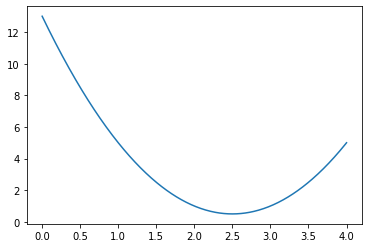

In [39]:
# creating the function and plotting it 
def f1(x,y):
    f1 = ((x-2)**2) + ((y-3)**2)
    return f1

#Get 1000 evenly spaced numbers between -1 and 3 (arbitratil chosen to ensure steep curve)
x = np.linspace(0,4,500)
y = np.linspace(0,4,500)

#Plot the curve
plt.plot(x,f1(x,y))
plt.show()

In [40]:
# Functions to calculate the derivative of function wrt x and y
def f1_derx(x):
    return 2*(x-2)

def f1_dery(y):
    return 2*(y-3)

#### 1) Running with fixed learing rate of alpha = 0.5

At iteration 0, Function = f(2.00,3.00) and Function value = 0.000
At iteration 1, Function = f(2.00,3.00) and Function value = 0.000
At iteration 2, Function = f(2.00,3.00) and Function value = 0.000
At iteration 3, Function = f(2.00,3.00) and Function value = 0.000
At iteration 4, Function = f(2.00,3.00) and Function value = 0.000
At iteration 5, Function = f(2.00,3.00) and Function value = 0.000
At iteration 6, Function = f(2.00,3.00) and Function value = 0.000
At iteration 7, Function = f(2.00,3.00) and Function value = 0.000
At iteration 8, Function = f(2.00,3.00) and Function value = 0.000
At iteration 9, Function = f(2.00,3.00) and Function value = 0.000


Text(0.5, 1.0, 'Function plot')

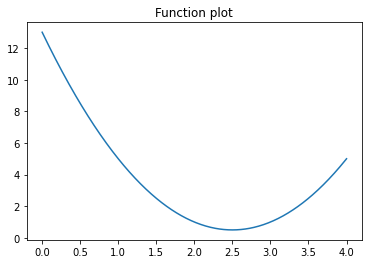

Text(0.5, 1.0, 'Gradient vs Function values')

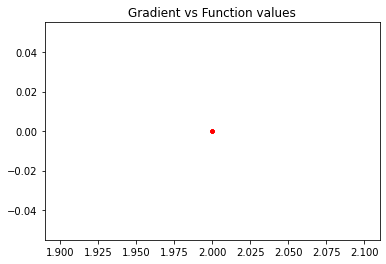

In [41]:
# Initialising x,y values to update using using gradient and alpha value
old_x = 0
old_y = 0
alpha = 0.5 
iter = 10
gradients_x = []
gradients_y = []
fn_values = []

grad_x = f1_derx(old_x) 
grad_y = f1_dery(old_y)

for i in range(iter):
  temp_x = old_x - (grad_x*alpha)
  temp_y = old_y - (grad_y*alpha)
  old_x = temp_x
  old_y = temp_y
  grad_x = f1_derx(old_x) 
  grad_y = f1_dery(old_y)
  fn_value = f1(old_x,old_y)
  gradients_x.append(old_x)
  gradients_y.append(old_y)
  fn_values.append(fn_value)
  # report progress
  print('At iteration {}, Function = f({:.2f},{:.2f}) and Function value = {:.3f}'.format(i,old_x,old_y,fn_value))

#Plot the curve
from matplotlib import pyplot
plt.plot(x,f1(x,y))
plt.title("Function plot")
plt.show()

plt.title('Gradient vs Function values')
pyplot.plot(gradients_x, fn_values, '.-', color='red')

#### 2) Running with learing rate of alpha = 0.25

I have tried for different values of learning rate and found that alpha = 0.25 is approximately the smallest value where the function begings to converge

At iteration 0, Function = f(1.00,1.50) and Function value = 3.250
At iteration 1, Function = f(1.50,2.25) and Function value = 0.812
At iteration 2, Function = f(1.75,2.62) and Function value = 0.203
At iteration 3, Function = f(1.88,2.81) and Function value = 0.051
At iteration 4, Function = f(1.94,2.91) and Function value = 0.013
At iteration 5, Function = f(1.97,2.95) and Function value = 0.003
At iteration 6, Function = f(1.98,2.98) and Function value = 0.001
At iteration 7, Function = f(1.99,2.99) and Function value = 0.000
At iteration 8, Function = f(2.00,2.99) and Function value = 0.000
At iteration 9, Function = f(2.00,3.00) and Function value = 0.000


Text(0.5, 1.0, 'Function plot')

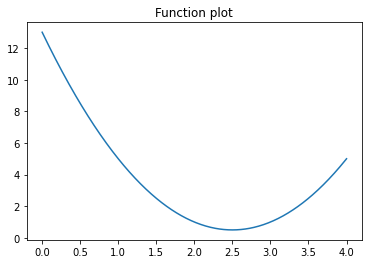

Text(0.5, 1.0, 'Gradient vs Function values')

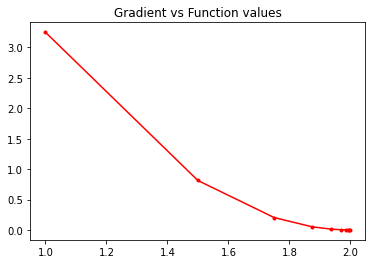

In [42]:
# Initialising no. of iterations, alpha and x,y values
iter = 10
old_x = 0
old_y = 0
alpha = 0.25
gradients_x = []
gradients_y = []
fn_values = []

grad_x = f1_derx(old_x) 
grad_y = f1_dery(old_y)

for i in range(iter):
  temp_x = old_x - (grad_x*alpha)
  temp_y = old_y - (grad_y*alpha)
  old_x = temp_x
  old_y = temp_y
  grad_x = f1_derx(old_x) 
  grad_y = f1_dery(old_y)
  fn_value = f1(old_x,old_y)
  gradients_x.append(old_x)
  gradients_y.append(old_y)
  fn_values.append(fn_value)
  # report progress
  print('At iteration {}, Function = f({:.2f},{:.2f}) and Function value = {:.3f}'.format(i,old_x,old_y,fn_value))

# plot the solutions found
#Plot the curve
from matplotlib import pyplot
plt.plot(x,f1(x,y))
plt.title("Function plot")
plt.show()

plt.title('Gradient vs Function values')
pyplot.plot(gradients_x, fn_values, '.-', color='red')

#### 3) Implementing Newton's method

In [43]:
def calc_newton(f, dx, dy, x, y, eps):
    fn_value = f(x,y)
    iteration_counter = 0
    while abs(fn_value) > eps and iteration_counter < 100:
        try:
            x = x - fn_value/dx(x)
            y = y - fn_value/dy(y)
        except ZeroDivisionError:
            print('Error! - derivative zero for x = ', x)
            sys.exit(1)     # Abort with error

        fn_value = f(x,y)
        iteration_counter = iteration_counter + 1

    if abs(fn_value) > eps:
        iteration_counter = -1
    return  x, y, iteration_counter

In [45]:
x, y, no_iterations = calc_newton(f1, f1_derx, f1_dery, x = 0, y= 0, eps=1.0e-6)

if no_iterations > 0:    # Solution found
    print('Solution is: ({:.2f},{:.2f})'.format(x,y))

Solution is: (2.00,3.00)


### Function 2

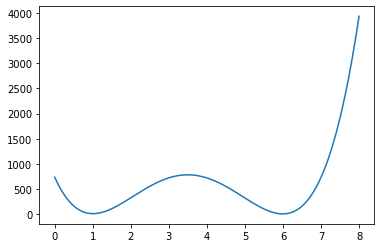

In [46]:
# creating the function and plotting it 
def f2(x,y):
    f2 = ((4-y)**2) + 20*(((x+3) - ((y-3)**2))**2)
    return f2

#Get 1000 evenly spaced numbers between -1 and 3 (arbitratil chosen to ensure steep curve)
x = np.linspace(0,8,500)
y = np.linspace(0,8,500)

#Plot the curve
plt.plot(x,f2(x,y))
plt.show()

In [47]:
# Functions to calculate the derivative of function wrt x and y
def f2_derx(x,y):
    return 40*(x+3)-(40*y)+120

def f2_dery(x,y):
    return 2*(y-3)-2+(40*(y-3))-(40*x)-120

#### 1) Running with fixed learing rate of alpha = 0.5

In [48]:
# Initialising x,y values to update using using gradient and alpha value
iter = 100
old_x = 0
old_y = 0
alpha = 0.5
gradients_x = []
gradients_y = []
fn_values = []

grad_x = f2_derx(old_x,old_y) 
grad_y = f2_dery(old_x,old_y)

gradients_x = []
gradients_y = []
fn_values = []

grad_x = f2_derx(old_x,old_y) 
grad_y = f2_dery(old_x,old_y)

for i in range(iter):
  temp_x = old_x - (grad_x*alpha)
  temp_y = old_y - (grad_y*alpha)
  old_x = temp_x
  old_y = temp_y
  grad_x = f2_derx(old_x,old_y) 
  grad_y = f2_dery(old_x,old_y)
  fn_value = f2(old_x,old_y)
  gradients_x.append(old_x)
  gradients_y.append(old_y)
  fn_values.append(fn_value)
  # report progress
  print('At iteration {}, Function = f({:.2f},{:.2f}) and Function value = {:.3f}'.format(i,old_x,old_y,fn_value))

#Plot the curve
plt.plot(x,f2(x,y))
plt.title("Function plot")
plt.show()

plt.title('Gradient vs Function values')
pyplot.plot(gradients_x, fn_values, '.-', color='red')

At iteration 0, Function = f(-120.00,124.00) and Function value = 4355985680.000
At iteration 1, Function = f(4640.00,-4756.00) and Function value = 10254505711854480.000
At iteration 2, Function = f(-183400.00,188044.00) and Function value = 25006027767941332729856.000
At iteration 3, Function = f(7245360.00,-7428756.00) and Function value = 60910891971062762243595698176.000
At iteration 4, Function = f(-286237080.00,293482444.00) and Function value = 148374233689292048062223148476530688.000
At iteration 5, Function = f(11308153280.00,-11594390356.00) and Function value = 361427894600786571403898469194772785397760.000
At iteration 6, Function = f(-446742719560.00,458050872844.00) and Function value = 880409775162337119608225294912232682562294644736.000
At iteration 7, Function = f(17649129128400.00,-18095871847956.00) and Function value = 2144608602066339780398394686030170652263660323323510784.000
At iteration 8, Function = f(-697250890398840.00,714900019527244.00) and Function value 

OverflowError: ignored

Learning rate = 0.5 for the above function is too high and the function could not converge due to high function values

#### 2) Running with learing rate of alpha = 0.003

I have tried for different values of learning rate and found that alpha = 0.003 is approximately the smallest value where the function begings to converge

At iteration 0, Function = f(-0.72,0.74) and Function value = 168.471
At iteration 1, Function = f(-1.26,1.31) and Function value = 32.680
At iteration 2, Function = f(-1.68,1.74) and Function value = 6.641
At iteration 3, Function = f(-1.99,2.06) and Function value = 4.100
At iteration 4, Function = f(-2.22,2.31) and Function value = 4.637
At iteration 5, Function = f(-2.40,2.49) and Function value = 4.653
At iteration 6, Function = f(-2.53,2.63) and Function value = 4.120
At iteration 7, Function = f(-2.63,2.74) and Function value = 3.418
At iteration 8, Function = f(-2.71,2.83) and Function value = 2.769
At iteration 9, Function = f(-2.76,2.89) and Function value = 2.251
At iteration 10, Function = f(-2.80,2.94) and Function value = 1.867
At iteration 11, Function = f(-2.84,2.97) and Function value = 1.591
At iteration 12, Function = f(-2.86,3.00) and Function value = 1.396
At iteration 13, Function = f(-2.87,3.03) and Function value = 1.260
At iteration 14, Function = f(-2.89,3.04)

Text(0.5, 1.0, 'Function plot')

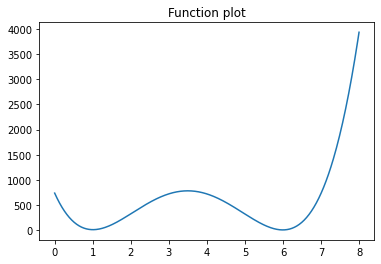

Text(0.5, 1.0, 'Gradient vs Function values')

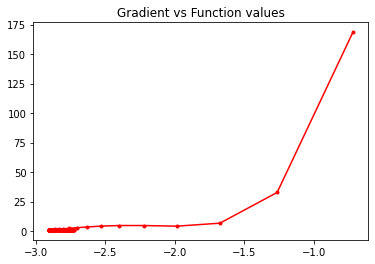

In [50]:
iter = 100
old_x = 0
old_y = 0
alpha = 0.003
gradients_x = []
gradients_y = []
fn_values = []

grad_x = f2_derx(old_x,old_y) 
grad_y = f2_dery(old_x,old_y)

for i in range(iter):
  temp_x = old_x - (grad_x*alpha)
  temp_y = old_y - (grad_y*alpha)
  old_x = temp_x
  old_y = temp_y
  grad_x = f2_derx(old_x,old_y) 
  grad_y = f2_dery(old_x,old_y)
  fn_value = f2(old_x,old_y)
  gradients_x.append(old_x)
  gradients_y.append(old_y)
  fn_values.append(fn_value)
  # report progress
  print('At iteration {}, Function = f({:.2f},{:.2f}) and Function value = {:.3f}'.format(i,old_x,old_y,fn_value))

# plot the solutions found
#Plot the curve
from matplotlib import pyplot
plt.plot(x,f2(x,y))
plt.title("Function plot")
plt.show()

plt.title('Gradient vs Function values')
pyplot.plot(gradients_x, fn_values, '.-', color='red')

The above function converges at a point and then diverges again for different values of learning rates

#### 3) Implementing Newton's method

In [52]:
def calc_newton2(f, dx, dy, x, y, eps):
    fn_value = f(x,y)
    iteration_counter = 0
    while abs(fn_value) > eps and iteration_counter < 100:
        try:
            x = x - fn_value/dx(x,y)
            y = y - fn_value/dy(x,y)
        except ZeroDivisionError:
            print('Error! - derivative zero for x = ', x)
            sys.exit(1)     # Abort with error

        fn_value = f(x,y)
        iteration_counter = iteration_counter + 1

    if abs(fn_value) > eps:
        iteration_counter = -1
    return  x, y, iteration_counter

In [56]:
x, y, no_iterations = calc_newton2(f2, f2_derx, f2_dery, x = -2, y= 2, eps=1.0e-6)

if no_iterations > 0:    # Solution found
    print('Solution is: ({:.2f},{:.2f})'.format(x,y))
else:
    print('Solution not found!')

OverflowError: ignored

The function is unable to converge due to high function values